## Overall Prediction Observation


In [5]:
# Define variables
IS_FILTERED = True
ARCHIVED = None

SHOW_HEADER = True
SHOW_LAST_APPEARANCE = None

In [6]:
# Import libraries
import sys
sys.path.append('../../prediction')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from putils.observation import compute_rmse, compute_mae, compute_mape, load_data_from_tuned_folder

In [7]:
# Load data
dfs = {
    "l1": load_data_from_tuned_folder("l1", last_appearance=SHOW_LAST_APPEARANCE),
    "l2": load_data_from_tuned_folder("l2", last_appearance=SHOW_LAST_APPEARANCE),
    "l3": load_data_from_tuned_folder("l3", last_appearance=SHOW_LAST_APPEARANCE),
}

# Make L1 and L2 data have the same length with L3 if SHOW_LAST_APPEARANCE = None
if SHOW_LAST_APPEARANCE is None:
    dfs["l1"] = dfs["l1"].tail(len(dfs["l3"]))
    dfs["l2"] = dfs["l2"].tail(len(dfs["l3"]))

# Indicate which columns to ignore
IGNORED_COLS = ["Time", "Actual"] # No need to include "FormattedTime" because it is used as index
if IS_FILTERED: IGNORED_COLS.append("Raw")

In [8]:
# Compute RMSE, MAE, and MAPE for each model
for key, df in dfs.items():
    print("Layer", key)
    for column in df.columns:
        if column not in IGNORED_COLS:
            actual = df["Raw"] if IS_FILTERED else df["Actual"]
            rmse = mean_squared_error(actual, df[column], squared=False)
            mape = compute_mape(actual, df[column])
            mae = compute_mae(actual, df[column])
            print(f"{column} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, MAPE: {mape:.2f}%")
    print("------------------")

Layer l1
ARIMA - RMSE: 0.0199, MAE: 0.0138, MAPE: 2.53%
SARIMA - RMSE: 0.0214, MAE: 0.0153, MAPE: 2.80%
ETS - RMSE: 0.0249, MAE: 0.0172, MAPE: 3.16%
GP - RMSE: 0.0938, MAE: 0.0579, MAPE: 10.67%
RNN - RMSE: 0.0133, MAE: 0.0096, MAPE: 1.75%
LSTM - RMSE: 0.0150, MAE: 0.0104, MAPE: 1.89%
CNN - RMSE: 0.0144, MAE: 0.0104, MAPE: 1.89%
GRU - RMSE: 0.0137, MAE: 0.0100, MAPE: 1.82%
TCN - RMSE: 0.0163, MAE: 0.0113, MAPE: 2.06%
------------------
Layer l2
LINEAR_REGRESSION - RMSE: 0.0135, MAE: 0.0097, MAPE: 1.77%
RANDOM_FOREST - RMSE: 0.0140, MAE: 0.0100, MAPE: 1.82%
FEEDFORWARD_NEURAL_NETWORK - RMSE: 0.0134, MAE: 0.0098, MAPE: 1.78%
------------------
Layer l3
Predicted - RMSE: 0.0134, MAE: 0.0097, MAPE: 1.76%
------------------


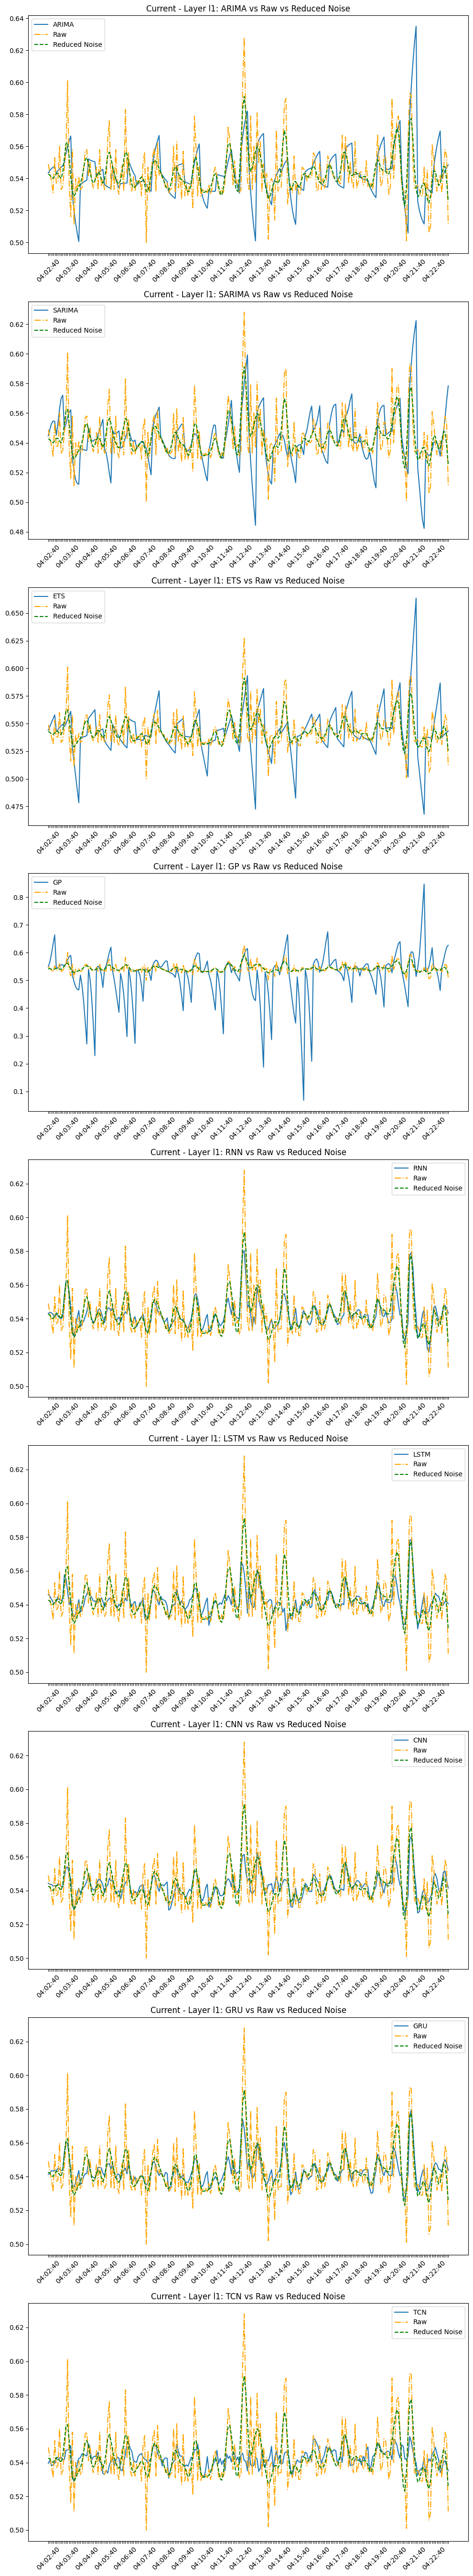

------------------


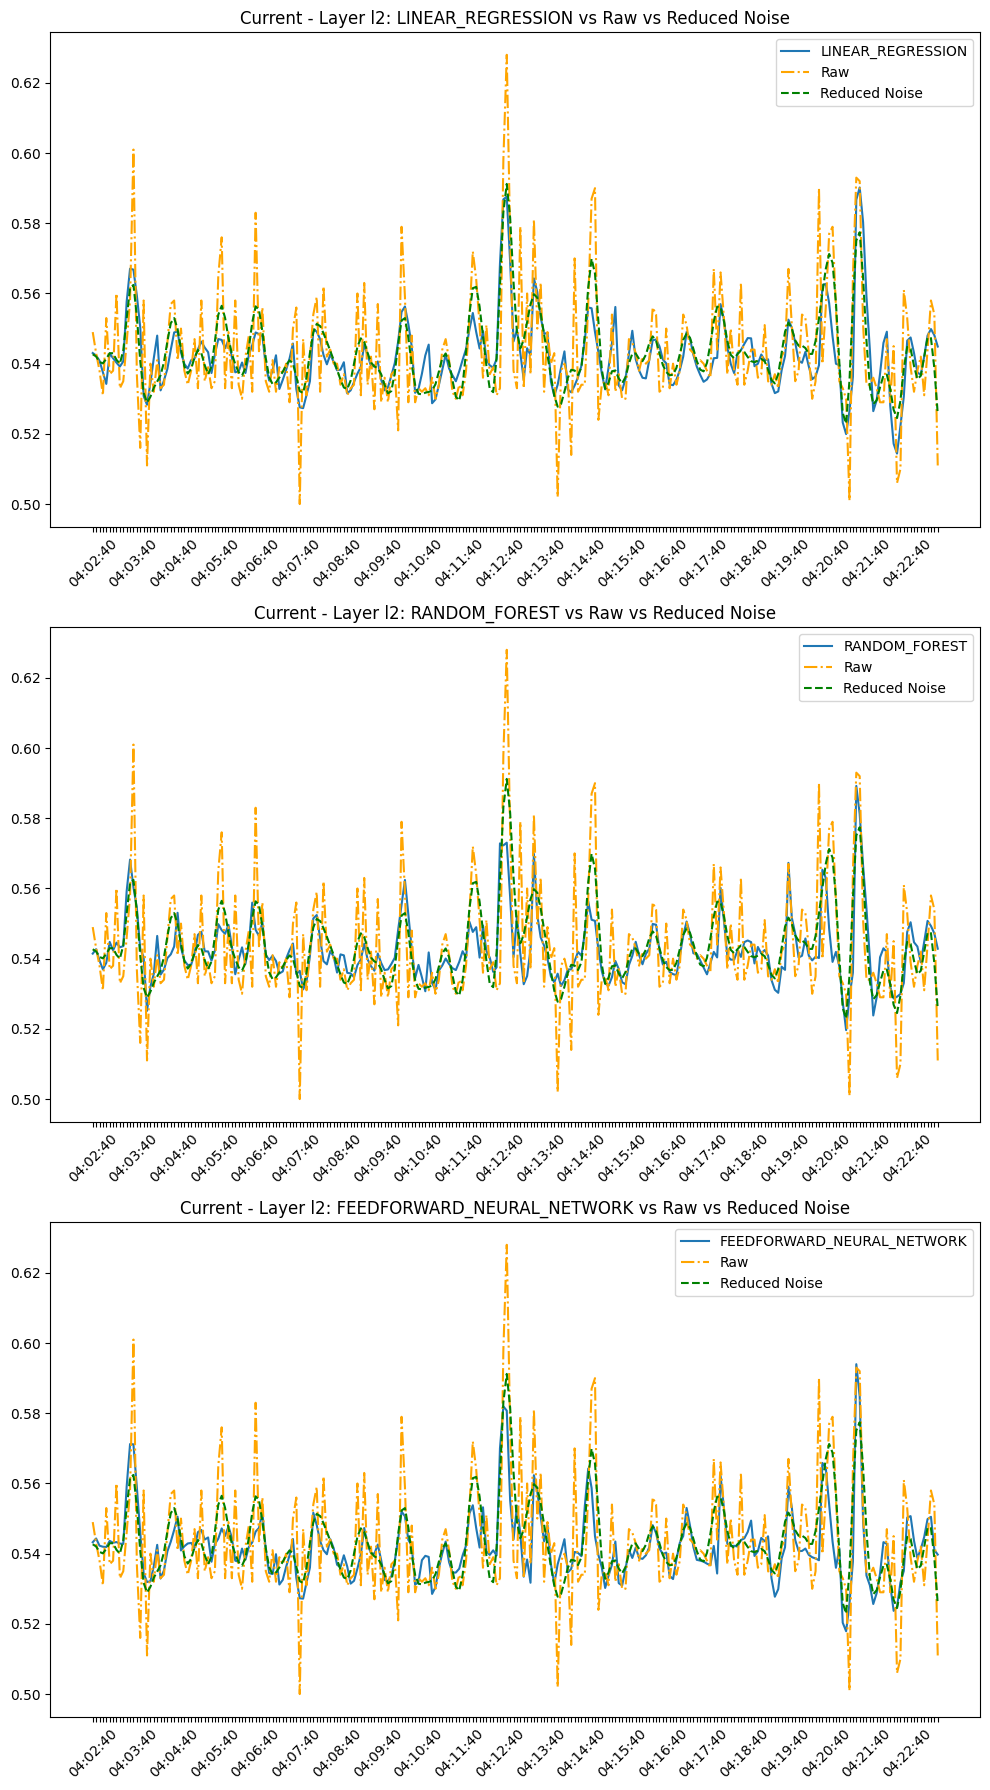

------------------


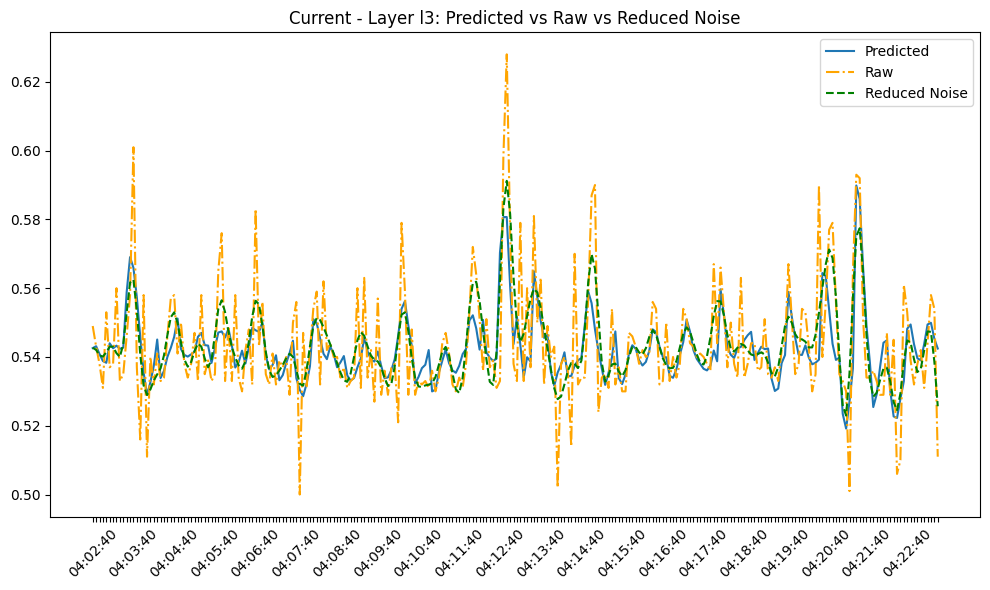

------------------


In [9]:
# Plot the data
header = (str(ARCHIVED) if ARCHIVED is not None else "Current") + " - "
header = header if SHOW_HEADER else ""

for key, df in dfs.items():
    # Plot the data
    fig, axes = plt.subplots(
        nrows=len(df.columns) - len(IGNORED_COLS),
        figsize=(10, 6 * (len(df.columns) - len(IGNORED_COLS))),
    )

    # Ensure axes is always a list or array
    if not isinstance(axes, np.ndarray):
        axes = [axes]

    ax_idx = 0  # Separate index for accessing axes

    for column in df.columns:
        if column not in IGNORED_COLS:
            actual_label = "Reduced Noise" if IS_FILTERED else "Raw"
            actual_color = "green" if IS_FILTERED else "orange"
            axes[ax_idx].plot(df.index, df[column], label=column)
            if IS_FILTERED:
                axes[ax_idx].plot(
                    df.index,
                    df["Raw"],
                    label="Raw",
                    linestyle="-.",
                    color="orange",
                )  # Added this line to plot the Raw values
            axes[ax_idx].plot(
                df.index,
                df["Actual"],
                label=actual_label,
                linestyle="--",
                color=actual_color,
            )

            # Sparse Tick Labels logic
            n = 12  # Display every n-th label
            for index, label in enumerate(axes[ax_idx].xaxis.get_ticklabels()):
                if index % n != 0:
                    label.set_visible(False)

            # Rotate the visible x-axis labels
            axes[ax_idx].tick_params(axis="x", rotation=45)

            axes[ax_idx].legend()
            # axes[ax_idx].grid(True) # Uncomment this line to show grid lines
            title = f"{header}Layer {key}: {column} vs Raw"
            if IS_FILTERED:
                title += " vs Reduced Noise"
            axes[ax_idx].set_title(title)
            ax_idx += 1  # Increment ax_idx

    plt.tight_layout()
    plt.show()
    print("------------------")